In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [301]:
df = pd.read_csv("./data/HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [302]:
# Data exploration and visualization
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [303]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [304]:
left = df[df['left'] == 1] # Filtered data for employees who left
left.shape  # Display

(3571, 10)

In [305]:
retained = df[df['left'] == 0] # Filtered data for employees who stayed
retained.shape  # Display

(11428, 10)

In [306]:
df.groupby('left').mean(numeric_only =True) # Group by 'left' and calculate mean of numerical columns

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


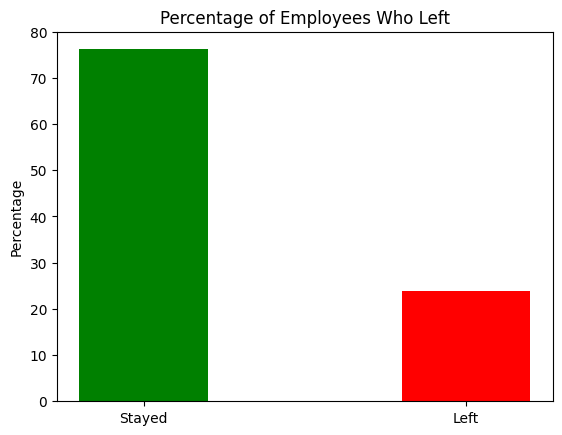

In [307]:
# visualize the percentage of employees who left
import matplotlib.pyplot as plt


left_count = df['left'].value_counts(normalize=True) * 100


plt.bar(left_count.index, left_count.values, color=['green', 'red'], width=0.4)
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.ylabel('Percentage')
plt.title('Percentage of Employees Who Left')
plt.show()

In [308]:
# percentage of each column groupby left
grouped_means = df.groupby('left').mean(numeric_only=True)  # Calculate mean of numerical columns grouped by 'left'
grouped_means  # Display the grouped means


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [309]:
# impact of salary on employee retention
salary_counts = df.groupby(['left', 'salary']).size().unstack()  # Count of employees by salary and retention status
salary_counts  # Display the counts

salary,high,low,medium
left,,,
0,1155,5144,5129
1,82,2172,1317


<Axes: xlabel='left'>

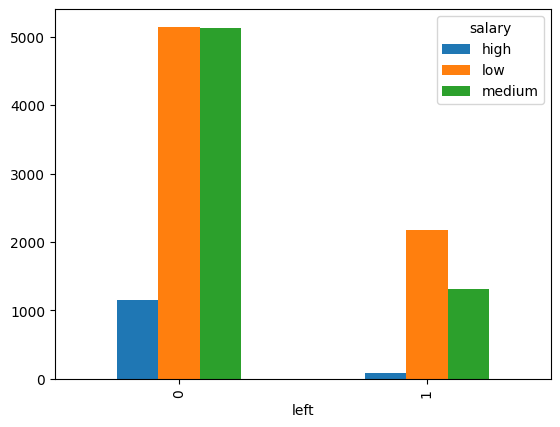

In [310]:
pd.crosstab(df['left'], df['salary']).plot(kind='bar')  # Create a crosstab of 'left' and 'salary' and plot it

<Axes: xlabel='salary'>

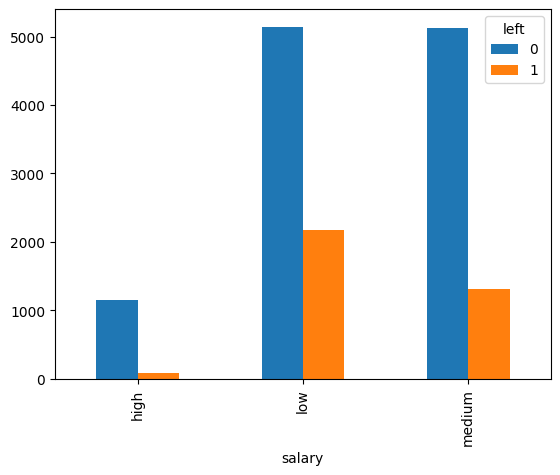

In [311]:
pd.crosstab(df['salary'], df['left']).plot(kind='bar') 

In [312]:
# department wise employee retention
department_counts = df.groupby(['left', 'Department']).size().unstack()  # Count of employees by department and retention status
department_counts  # Display the counts

Department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
left,,,,,,,,,,
0,954,666,563,524,539,655,704,3126,1674,2023
1,273,121,204,215,91,203,198,1014,555,697


<Axes: xlabel='left'>

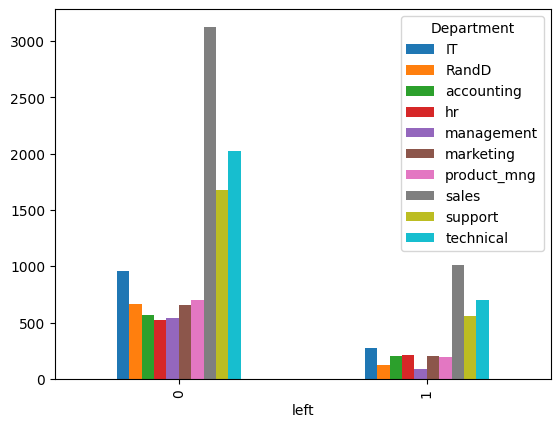

In [313]:
pd.crosstab(df['left'], df['Department']).plot(kind='bar')  # Create a crosstab of 'left' and 'Department' and plot it

<Axes: xlabel='Department'>

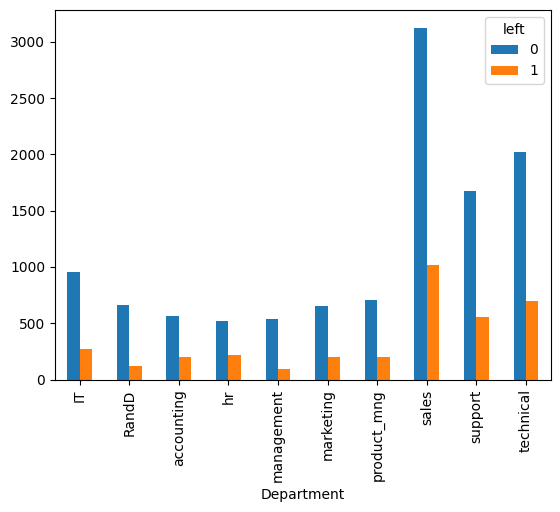

In [314]:
pd.crosstab(df['Department'], df['left']).plot(kind='bar')  # Create a crosstab of 'left' and 'Department' and plot it

In [315]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [316]:
# last evaluation vs left
last_evaluation_counts = df.groupby(['left', df['last_evaluation'] > 0.7]).size().unstack()  # Count of employees by last evaluation and retention status
last_evaluation_counts  # Display the counts
    

last_evaluation,False,True
left,,
0,5527,5901
1,1670,1901


In [317]:
last_evaluation_counts = df.groupby(["left", "last_evaluation"]).size().unstack()  # Count of employees by last evaluation and retention status
last_evaluation_counts

last_evaluation,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00
left,,,,,,,,,,,,,,,,,,,,,
0,22.0,55.0,50.0,52.0,57.0,59.0,56.0,50.0,44.0,50.0,...,216.0,171.0,174.0,182.0,177.0,182.0,192.0,199.0,192.0,116.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,...,71.0,98.0,95.0,81.0,81.0,67.0,84.0,64.0,66.0,167.0


<Axes: xlabel='last_evaluation'>

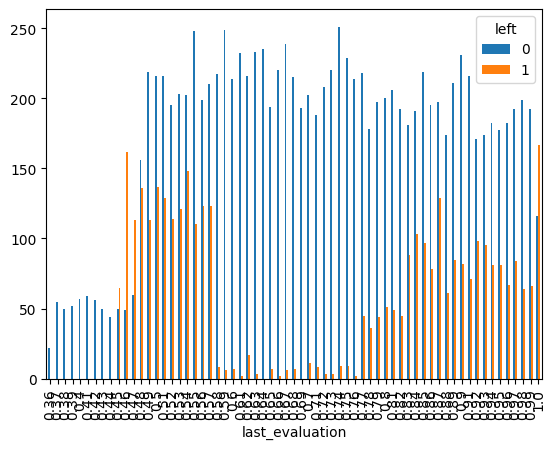

In [318]:
pd.crosstab(df["last_evaluation"], df["left"]).plot(kind="bar")  # Create a crosstab of 'last_evaluation' and 'left' and plot it


In [319]:
df.groupby(["Work_accident", "left"]).size().unstack()  

left,0,1
Work_accident,,
0,9428,3402
1,2000,169


In [320]:
df.drop(["Work_accident"], axis=1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,1,0,sales,low
1,0.80,0.86,5,262,6,1,0,sales,medium
2,0.11,0.88,7,272,4,1,0,sales,medium
3,0.72,0.87,5,223,5,1,0,sales,low
4,0.37,0.52,2,159,3,1,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,1,0,support,low
14995,0.37,0.48,2,160,3,1,0,support,low
14996,0.37,0.53,2,143,3,1,0,support,low
14997,0.11,0.96,6,280,4,1,0,support,low


In [321]:
#number of projects vs left
df.groupby(["number_project", "left"]).size().unstack()  # Count of employees by number of projects and retention status


left,0,1
number_project,,
2,821.0,1567.0
3,3983.0,72.0
4,3956.0,409.0
5,2149.0,612.0
6,519.0,655.0
7,NaN,256.0


<Axes: xlabel='number_project'>

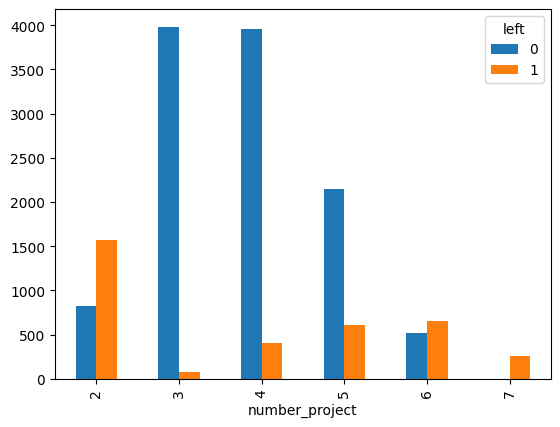

In [322]:
pd.crosstab(df["number_project"], df["left"]).plot(kind="bar")  # Create a crosstab of 'number_project' and 'left' and plot it

In [323]:
#promotion vs left
df.groupby(["promotion_last_5years", "left"]).size().unstack()  # Count of employees by promotion status and retention status

left,0,1
promotion_last_5years,,
0,11128,3552
1,300,19


In [324]:
retained.shape

(11428, 10)

<Axes: xlabel='promotion_last_5years'>

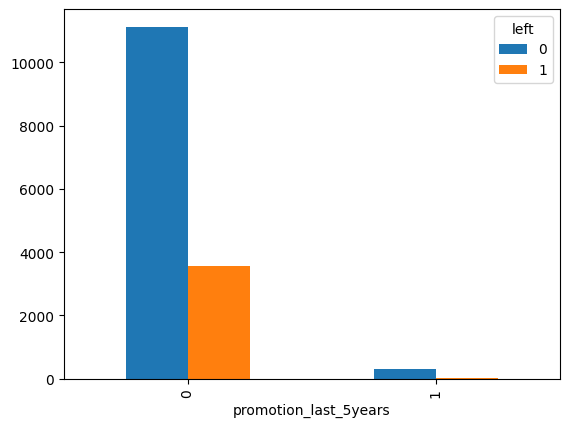

In [325]:
pd.crosstab(df["promotion_last_5years"], df["left"]).plot(kind="bar")  # Create a crosstab of 'promotion_last_5years' and 'left' and

In [326]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [327]:
df1 = df.drop(['Work_accident', 'Department'], axis = True)

In [328]:
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,1,0,low
1,0.80,0.86,5,262,6,1,0,medium
2,0.11,0.88,7,272,4,1,0,medium
3,0.72,0.87,5,223,5,1,0,low
4,0.37,0.52,2,159,3,1,0,low
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,1,0,low
14995,0.37,0.48,2,160,3,1,0,low
14996,0.37,0.53,2,143,3,1,0,low
14997,0.11,0.96,6,280,4,1,0,low


In [329]:
df.salary.describe()

count     14999
unique        3
top         low
freq       7316
Name: salary, dtype: object

In [330]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [331]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [332]:
main = df.drop(["Department", "Work_accident"], axis = True)
main

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,1,0,low
1,0.80,0.86,5,262,6,1,0,medium
2,0.11,0.88,7,272,4,1,0,medium
3,0.72,0.87,5,223,5,1,0,low
4,0.37,0.52,2,159,3,1,0,low
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,1,0,low
14995,0.37,0.48,2,160,3,1,0,low
14996,0.37,0.53,2,143,3,1,0,low
14997,0.11,0.96,6,280,4,1,0,low


In [333]:
main.time_spend_company.unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7])

In [334]:
# time spend company vs left
df.groupby("time_spend_company")["left"].mean()

time_spend_company
2     0.016338
3     0.246159
4     0.348064
5     0.565513
6     0.291086
7     0.000000
8     0.000000
10    0.000000
Name: left, dtype: float64

In [335]:
main = main.drop(["time_spend_company"], axis = True)
main

,satisfaction_level,last_evaluation,number_project,average_montly_hours,left,promotion_last_5years,salary
0,0.38,0.53,2,157,1,0,low
1,0.80,0.86,5,262,1,0,medium
2,0.11,0.88,7,272,1,0,medium
3,0.72,0.87,5,223,1,0,low
4,0.37,0.52,2,159,1,0,low
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,1,0,low
14995,0.37,0.48,2,160,1,0,low
14996,0.37,0.53,2,143,1,0,low
14997,0.11,0.96,6,280,1,0,low


In [336]:
# left vs average monthly hours
df.groupby(["average_montly_hours", "left"]).size().unstack()

left,0,1
average_montly_hours,,
96,6.0,NaN
97,14.0,NaN
98,23.0,NaN
99,11.0,NaN
100,19.0,NaN
...,...,...
306,NaN,18.0
307,NaN,14.0
308,NaN,20.0


In [337]:
df.groupby("left")["average_montly_hours"].mean().reset_index()

,left,average_montly_hours
0,0,199.060203
1,1,207.419210


In [338]:
# groupby the data according to left and then calculate mean of average monthly hours
p = df.groupby(["left"])

In [339]:
p_mean = p.average_montly_hours.mean()
p_mean

left
0    199.060203
1    207.419210
Name: average_montly_hours, dtype: float64

In [340]:
main = main.drop(["average_montly_hours"], axis=1)
main

,satisfaction_level,last_evaluation,number_project,left,promotion_last_5years,salary
0,0.38,0.53,2,1,0,low
1,0.80,0.86,5,1,0,medium
2,0.11,0.88,7,1,0,medium
3,0.72,0.87,5,1,0,low
4,0.37,0.52,2,1,0,low
...,...,...,...,...,...,...
14994,0.40,0.57,2,1,0,low
14995,0.37,0.48,2,1,0,low
14996,0.37,0.53,2,1,0,low
14997,0.11,0.96,6,1,0,low


In [341]:
duummies = pd.get_dummies(df["salary"])
duummies

,high,low,medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [342]:
main = pd.concat([main, duummies], axis=1)
main

,satisfaction_level,last_evaluation,number_project,left,promotion_last_5years,salary,high,low,medium
0,0.38,0.53,2,1,0,low,False,True,False
1,0.80,0.86,5,1,0,medium,False,False,True
2,0.11,0.88,7,1,0,medium,False,False,True
3,0.72,0.87,5,1,0,low,False,True,False
4,0.37,0.52,2,1,0,low,False,True,False
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,1,0,low,False,True,False
14995,0.37,0.48,2,1,0,low,False,True,False
14996,0.37,0.53,2,1,0,low,False,True,False
14997,0.11,0.96,6,1,0,low,False,True,False


In [343]:
main = main.drop(["medium", "salary"], axis=1)

In [344]:
main

,satisfaction_level,last_evaluation,number_project,left,promotion_last_5years,high,low
0,0.38,0.53,2,1,0,False,True
1,0.80,0.86,5,1,0,False,False
2,0.11,0.88,7,1,0,False,False
3,0.72,0.87,5,1,0,False,True
4,0.37,0.52,2,1,0,False,True
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,1,0,False,True
14995,0.37,0.48,2,1,0,False,True
14996,0.37,0.53,2,1,0,False,True
14997,0.11,0.96,6,1,0,False,True


In [345]:
x = main.drop(["left"], axis=1)
x

,satisfaction_level,last_evaluation,number_project,promotion_last_5years,high,low
0,0.38,0.53,2,0,False,True
1,0.80,0.86,5,0,False,False
2,0.11,0.88,7,0,False,False
3,0.72,0.87,5,0,False,True
4,0.37,0.52,2,0,False,True
...,...,...,...,...,...,...
14994,0.40,0.57,2,0,False,True
14995,0.37,0.48,2,0,False,True
14996,0.37,0.53,2,0,False,True
14997,0.11,0.96,6,0,False,True


In [346]:
y = main["left"]
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [347]:
x

,satisfaction_level,last_evaluation,number_project,promotion_last_5years,high,low
0,0.38,0.53,2,0,False,True
1,0.80,0.86,5,0,False,False
2,0.11,0.88,7,0,False,False
3,0.72,0.87,5,0,False,True
4,0.37,0.52,2,0,False,True
...,...,...,...,...,...,...
14994,0.40,0.57,2,0,False,True
14995,0.37,0.48,2,0,False,True
14996,0.37,0.53,2,0,False,True
14997,0.11,0.96,6,0,False,True


In [348]:
x = x.drop(["number_project"], axis=1)
x

,satisfaction_level,last_evaluation,promotion_last_5years,high,low
0,0.38,0.53,0,False,True
1,0.80,0.86,0,False,False
2,0.11,0.88,0,False,False
3,0.72,0.87,0,False,True
4,0.37,0.52,0,False,True
...,...,...,...,...,...
14994,0.40,0.57,0,False,True
14995,0.37,0.48,0,False,True
14996,0.37,0.53,0,False,True
14997,0.11,0.96,0,False,True


In [349]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [350]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [351]:
n = df["average_montly_hours"]
n

0        157
1        262
2        272
3        223
4        159
        ... 
14994    151
14995    160
14996    143
14997    280
14998    158
Name: average_montly_hours, Length: 14999, dtype: int64

In [352]:
x

,satisfaction_level,last_evaluation,promotion_last_5years,high,low
0,0.38,0.53,0,False,True
1,0.80,0.86,0,False,False
2,0.11,0.88,0,False,False
3,0.72,0.87,0,False,True
4,0.37,0.52,0,False,True
...,...,...,...,...,...
14994,0.40,0.57,0,False,True
14995,0.37,0.48,0,False,True
14996,0.37,0.53,0,False,True
14997,0.11,0.96,0,False,True


In [353]:
x = pd.concat([x, n], axis=1)

In [354]:
x

,satisfaction_level,last_evaluation,promotion_last_5years,high,low,average_montly_hours
0,0.38,0.53,0,False,True,157
1,0.80,0.86,0,False,False,262
2,0.11,0.88,0,False,False,272
3,0.72,0.87,0,False,True,223
4,0.37,0.52,0,False,True,159
...,...,...,...,...,...,...
14994,0.40,0.57,0,False,True,151
14995,0.37,0.48,0,False,True,160
14996,0.37,0.53,0,False,True,143
14997,0.11,0.96,0,False,True,280


In [355]:
logreg = LogisticRegression()
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size = 0.3)  # Split the data into training and testing sets
logreg.fit(x_train, y_train)  # Fit the model on the training data
y_pred = logreg.predict(x_test)  # Make predictions on the test data
accuracy = logreg.score(x_test, y_test)  # Evaluate the model on the test data
print(f"Model accuracy: {accuracy}")  # Print the accuracy of the model 

Model accuracy: 0.7809315172873607


c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [356]:
cross_val_score(logreg, x, y, cv=5).mean()  # Perform cross-validation and print the mean accuracy

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


np.float64(0.7756519284205847)

In [357]:
x.columns

Index(['satisfaction_level', 'last_evaluation', 'promotion_last_5years',
       'high', 'low', 'average_montly_hours'],
      dtype='object')

In [358]:
# Prediction 
###Index(['satisfaction_level', 'last_evaluation', 'promotion_last_5years','high', 'low', 'average_montly_hours'],dtype='object')###  
logreg.predict([[0.37, 0.52, 0, 1, 0, 159]])  # Make predictions on the test data

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [359]:
def encode_salary(salary_input):
    salary_input = salary_input.strip().lower()

    if salary_input == 'high':
        return [1, 0]  # [salary_high, salary_low]
    elif salary_input == 'low':
        return [0, 1]  # [salary_high, salary_low]
    else:
        return [0, 0]  # For 'medium' or if you're avoiding dummy variable trap


In [363]:
# User inputs
salary = input("Enter salary (low, medium, high): ")
satisfaction_level = float(input("Enter satisfaction level: "))
last_evaluation = float(input("Enter last evaluation score: "))
promotion_last_5years = int(input("Enter promotion in last 5 years (0 or 1): "))
average_monthly_hours = int(input("Enter average monthly hours: "))

# Convert salary to binary dummy variables
salary_high, salary_low = encode_salary(salary)

# Create input for model
features = [[satisfaction_level, last_evaluation, promotion_last_5years, salary_high, salary_low, average_monthly_hours]]

# Predict
prediction = logreg.predict(features)[0]
if prediction == 1:
    print("The employee is likely to leave the company.")
else:
    print("The employee is likely to stay with the company.")

# prediction probability
probability = logreg.predict_proba(features)[0][1] 
print(f"The probability of the employee leaving the company is: {probability:.2f}")

The employee is likely to leave the company.
The probability of the employee leaving the company is: 0.59


c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
